In [1]:
from utils import plot_result,plot_result_grid

# 0. tl;dr

* Using a simple DQN agent with a 256/128/16 network structure yields very good results and <b>_solves the task in 251 episodes_ </b>.

* DDQN and Prioritized Experience Replay yield/ no improvements.

* Future work includes a more extensive search of the hyperparameters and network structure and the implementation of Dueling DQN

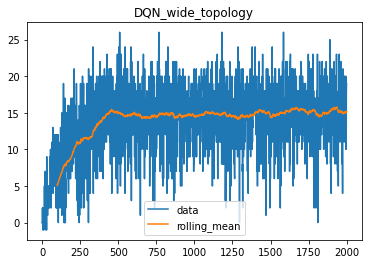

In [2]:
plot_result('./results/DQN_wide_topology')

# 1. Task and implemented algorithms

The task was to train a Deep Reinforcement Learninnng to navigate and collect bananas in a large, square world. 
For a more complete description of the problem, please review the README.md of this repository.

To accomplish this, I implemented three variants of the DQN algorithm, with two topologies and a coarse hyper-parameter search:

1. <a href="https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf">Vanilla DQN.</a>
2. <a href="https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf">Double DQN.</a>
3. <a href="https://arxiv.org/abs/1511.05952Prioritized"> Prioritized Replay + Double DQN.</a>.

Prioritized replay was implemented using the direct, proportional prioritization described in the paper and a SumTree data structure for efficiently sampling in log(N) time. 


# 2. Results and methodology.

Following an agile approach, I started with the simplest algorithm: the original Deep Q Network implementation. 

I experimented with a few network topologies,ranking them by the learning speed/maximum score.

The best network of the ones I tried consisted of a multi-layer perceptron (MLP) with three layers: [256, 128, 32] (<b> wide topology</b>). This network was able to solve the task in 251 episodes.
    
As a reference you can also look at the plot for a deeper topology consisting of a MLP with these hidden layers: [128,128,64,64,32,32,16,16,8,8] (<b> deep topology</b>)
    
Unless otherwise stated, the hyperparams used for all the experiments were:

* BUFFER_SIZE = int(1e5) 
* BATCH_SIZE = 64         
* GAMMA = 0.99            
* TAU = 1e-3             
* LR = 5e-4               
* UPDATE_EVERY = 4       
* EPSILON annealed from 1.0 to 0.01 with a decay factor of 0.9999

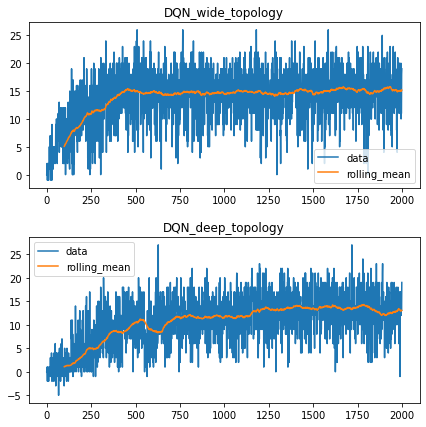

In [3]:
plot_result_grid(['./results/DQN_wide_topology','./results/DQN_deep_topology'],2,1)

Note that no hyper-parameter tuning was performed for training these networks.

It's clear that the "wide" topology is able to learn much faster and more robustly, although having a comparable number of parameters. However, a more thorough and systematic search of hyper-parameters and topologies should be performed. Common wisdom is that a deeper network should be able to generalize better than a shallow, wider one. 

For the sake of learning, I prefered trying two variants to the original formulation: Double Deep Q Learning and Prioritized Experience Replay, rather than improving the hyper-param and network structure search.


## 2.1 Double DQN.

Double DQN seeks to address a bias introduced when using the max operator of the update rule. Rather than using the Maximum Q value from a single model, it uses one model to pick the best action and another to evaluate its value.

This is the simplest modification to the previous work and the first alternative I implemented. Below you can find the plots for the two topologies

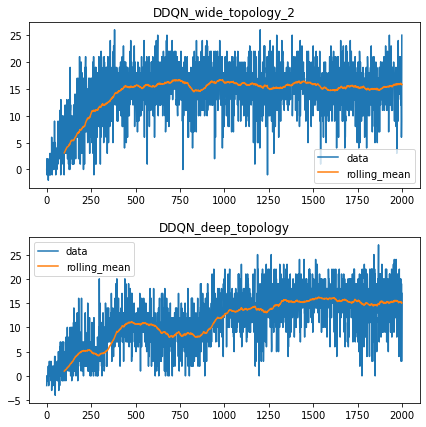

In [4]:
plot_result_grid(['./results/DDQN_wide_topology_2','./results/DDQN_deep_topology'],2,1)

And here you can find the comparison of the wide topology, using DQN vs DDQN

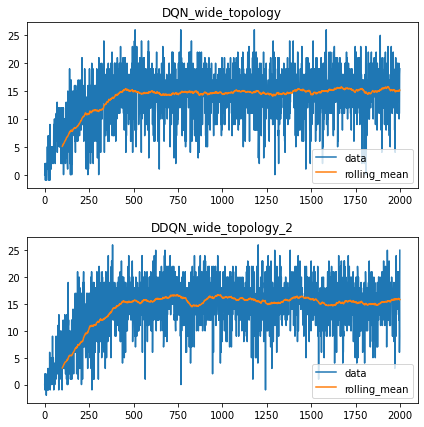

In [5]:
plot_result_grid(['./results/DQN_wide_topology','./results/DDQN_wide_topology_2'],2,1)

It doesn't seem like using DDQN produces a very significant improvement. The DDQN solves the task in 262 episodes (vs 251), but seems to achieve the maximum performance slightly before.

## 2.2 Prioritized experience replay Double DQN.

Given to choose between prioritized experience replay and Dueling DQN, I preferred the former. In the studied papers, Prioritized experience replay yielded significant improvements over a big majority of Atari tasks whilst Dueling DQN only showed improvements on a smaller subset.

For the implementation of Prioritized Experience Replay, I studied and replicated an <a href="https://pylessons.com/CartPole-PER/">online implementation of a SumTree.</a> 

At the beggining I had difficulties making the network converge. To address this, I first verified that the implementation was correct, by setting  α = 0, β = 0. Doing this allowed me to compare and verify similar performances with respect to the previous agents.

Second, to address vanishing weights in my NN, I took note of the batch size reduction explained in the paper. Reducing the batch size from 64 to 16 allowed for the convergence of the network. Other alternatives like changing the learning rate did not work.

Below you can find the results for the 2 topologies, using different levels of prioritization:

* low == α=0.25
* medium == α=0.25
* high == α=1

β was annealed from 0.4 to 1.

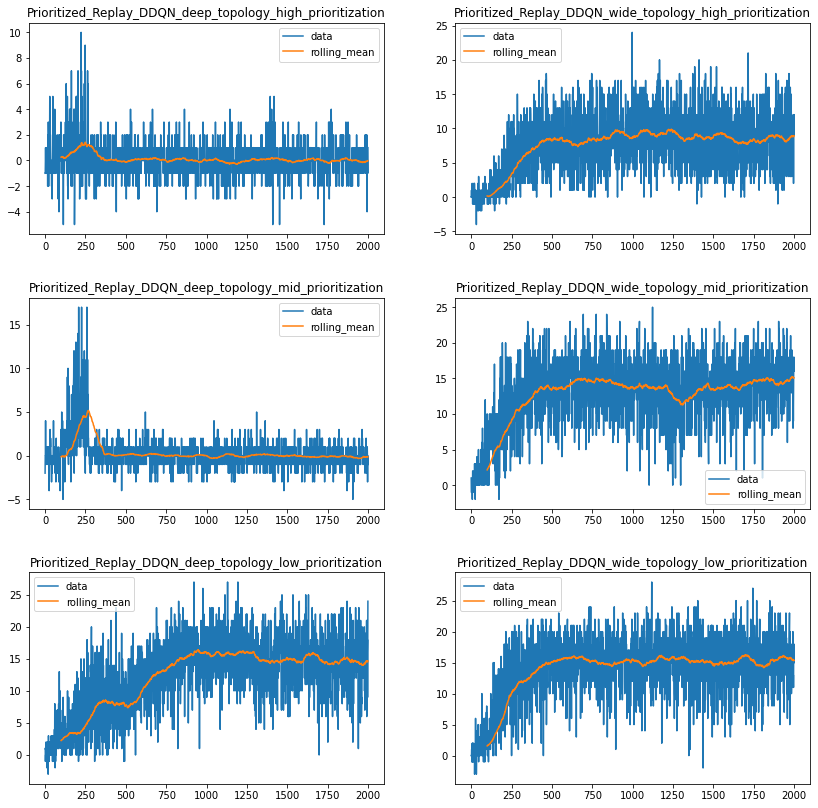

In [6]:
plot_result_grid(['./results/Prioritized_Replay_DDQN_deep_topology_high_prioritization',
                  './results/Prioritized_Replay_DDQN_wide_topology_high_prioritization',
                  './results/Prioritized_Replay_DDQN_deep_topology_mid_prioritization',
                  './results/Prioritized_Replay_DDQN_wide_topology_mid_prioritization',
                  './results/Prioritized_Replay_DDQN_deep_topology_low_prioritization',
                  './results/Prioritized_Replay_DDQN_wide_topology_low_prioritization',
                  ],3,2,fig_size=(14,14))

For this problem it seems Prioritized Replay is not very effective. Out of the six solutions, the best one is using the "wide" topology with a very low prioritization. 

Below you may see how it compares with its uniform sampling DDQN counterpart.

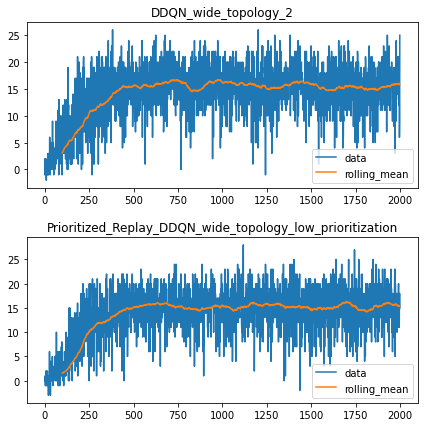

In [7]:
plot_result_grid(['./results/DDQN_wide_topology_2',
                  './results/Prioritized_Replay_DDQN_wide_topology_low_prioritization'],2,1)

# Conclusions and future work.

For this problem, the simplest approach with a DQN agent featuring a 256/128/32 MLP topology seems to give very good results and solves the task in 251 episodes. DDQN and prioritized experience replay introduce little to no improvements.

As future work, I would prioritize:

1) Better hyper-parameter and network structure search, for each agent variant. It seems prioritized experience replay is particularly susceptible to changes in batch size.

2) Dueling DQN